# 4/ Problem solutions

In [1]:
# helper code needed for running in colab
if 'google.colab' in str(get_ipython()):
    print('Downloading plot_helpers.py to util/ (only neded for colab')
    !mkdir util; wget https://raw.githubusercontent.com/minireference/noBSLAnotebooks/master/util/plot_helpers.py -P util

In [2]:
# setup SymPy
from sympy import *
init_printing()

# setup plotting
%matplotlib inline
import matplotlib.pyplot as mpl
from util.plot_helpers import plot_plane, plot_line, plot_vec, plot_vecs

# aliases
Vector = Matrix  # define alias Vector so I don't have to explain this during video
Point = Vector   # define alias Point for Vector since they're the same thing

## P4.2

Find the lines of intersection between these pairs of planes:  
**a)** $P_1$: $3x-2y-z=2$ and $P_2$: $x+2y+z=0$,  
**b)** $P_3$: $2x+y-z=0$ and $P_4$: $x+2y+z=3$.

<!--
		\begin{answer}\textbf{a)}~;
					\textbf{b)}~.\end{answer}
		%	A = Matrix([[1,-2,-1,2],[1,2,1,0]])
		%	A.rref()
		%	
-->

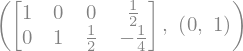

In [3]:
# a)         x   y   z  | c 
A = Matrix([[3, -2, -1,   2],
            [1,  2,  1,   0]])
A.rref()

So $z=s$ is a free variable, and the rest of the equation
can be written as

$$
  \begin{array}{rl}
  x                 &= \frac{1}{2}\\
  y + \frac{1}{2}s  &= -\frac{1}{4}\\
  z                 &= s
  \end{array}
$$

The answer is $(x,y,z) = (\frac{1}{2},-\frac{1}{4},0) + s(0,-\frac{1}{2},1),  \forall s \in \mathbb{R}$.

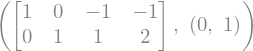

In [4]:
# b)         x   y   z  | c 
B = Matrix([[2,  1, -1,   0],
            [1,  2,  1,   3]])
B.rref()

The free variable is $z=t$.
The answer to b) is $\{ (-1,2,0) + t(1,-1,1), \forall t \in \mathbb{R}\}$.

## P4.11

vPperp = Matrix([[4/7], [-2/7], [8/7]])
vP = Matrix([[17/7], [30/7], [-1/7]])


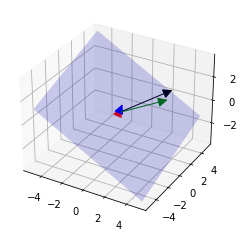

In [5]:
v = Vector([3, 4, 1])
normal = Vector([2, -1, 4])

vPperp = (normal.dot(v)/normal.norm()**2)*normal
print('vPperp =', vPperp)
vP = v - vPperp
print('vP =', vP)

plot_plane(normal, 0)            # plane P
plot_vec(0.2*normal, color='r')  # its normal vec

plot_vecs(v, vPperp, vP)

vPperp Matrix([[4/7], [-2/7], [8/7]])
v_wrong Matrix([[17/7], [30/7], [-1/7]])


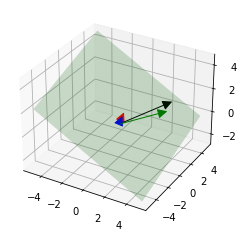

In [6]:
v = Vector([3,   4,  1])
normal = Vector([2,   -1,  4])
D=4
# point on P closest to the origin
alpha = D/normal.norm()**2
p_closest = alpha*normal
# print('len normal', normal.norm())
# print('p_closest', p_closest)
assert p_closest.dot(normal) == 4


vPperp = (normal.dot(v)/normal.norm()**2)*normal
print('vPperp', vPperp)
v_wrong = v - vPperp
print('v_wrong', v_wrong)


plot_plane(normal, D)                          # plane P
plot_vec(0.2*normal, at=p_closest, color='r')  # its normal vec


plot_vecs(v, vPperp, v_wrong)
ax = mpl.gca()
ax.grid(True,which='both')

uPperp Matrix([[4/21], [-2/21], [8/21]])
proj_v_on_P Matrix([[59/21], [86/21], [13/21]])


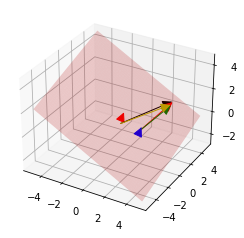

In [7]:
v = Vector([3,   4,  1])
normal = Vector([2,   -1,  4])
D = 4

# some point on P
p0 = Point([2,0,0])

u = v - p0  # vector from p0 to tip of v

uPperp = (normal.dot(u)/normal.norm()**2)*normal
print('uPperp', uPperp)
uInP = u - uPperp

proj_v_on_P = p0 + uInP
print('proj_v_on_P', proj_v_on_P)


plot_plane(normal, D)                          # plane P
plot_vec(0.2*normal, at=p_closest, color='r')  # its normal vec

plot_vec(v)
plot_vec(u, at=p0, color='r')
plot_vec(uPperp, at=p0, color='b')
plot_vec(uInP, at=p0, color='g')
plot_vec(proj_v_on_P, color='y')

ax = mpl.gca()
ax.grid(True,which='both')